In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fraud_data=pd.read_csv("D:/data_structure/decision_tree/Fraud_check.csv",index_col=0)
fraud_data

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO
...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES
YES,Divorced,69967,55369,2,YES
NO,Divorced,47334,154058,0,YES


In [3]:
fraud_data.shape

(600, 5)

In [4]:
fraud_data.loc[fraud_data['Taxable.Income']>30000, 'Income']='Good'
fraud_data.loc[fraud_data['Taxable.Income']<=30000, 'Income']='Risky'

In [5]:
fraud_data.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,Good
YES,Divorced,33700,134075,18,YES,Good
NO,Married,36925,160205,30,YES,Good
YES,Single,50190,193264,15,YES,Good
NO,Married,81002,27533,28,NO,Good


In [6]:
fraud_data1=fraud_data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'Taxable_income','City.Population':'City_populatoin','Work.Experience':'Work_experience'})
fraud_data1

,marital_status,Taxable_income,City_populatoin,Work_experience,Urban,Income
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,Good
YES,Divorced,33700,134075,18,YES,Good
NO,Married,36925,160205,30,YES,Good
YES,Single,50190,193264,15,YES,Good
NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES,Good
YES,Divorced,69967,55369,2,YES,Good
NO,Divorced,47334,154058,0,YES,Good


In [7]:
fraud_data1

,marital_status,Taxable_income,City_populatoin,Work_experience,Urban,Income
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,Good
YES,Divorced,33700,134075,18,YES,Good
NO,Married,36925,160205,30,YES,Good
YES,Single,50190,193264,15,YES,Good
NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES,Good
YES,Divorced,69967,55369,2,YES,Good
NO,Divorced,47334,154058,0,YES,Good


In [8]:
label_encoder=preprocessing.LabelEncoder()
fraud_data1['marital_status']=label_encoder.fit_transform(fraud_data1['marital_status'])
fraud_data1['Urban']=label_encoder.fit_transform(fraud_data1['Urban'])

In [9]:
fraud_data1

,marital_status,Taxable_income,City_populatoin,Work_experience,Urban,Income
Undergrad,,,,,,
NO,2,68833,50047,10,1,Good
YES,0,33700,134075,18,1,Good
NO,1,36925,160205,30,1,Good
YES,2,50190,193264,15,1,Good
NO,1,81002,27533,28,0,Good
...,...,...,...,...,...,...
YES,0,76340,39492,7,1,Good
YES,0,69967,55369,2,1,Good
NO,0,47334,154058,0,1,Good


In [10]:
x= fraud_data1.drop('Income',axis=1)

In [11]:
y= fraud_data1['Income']

In [12]:
x

,marital_status,Taxable_income,City_populatoin,Work_experience,Urban
Undergrad,,,,,
NO,2,68833,50047,10,1
YES,0,33700,134075,18,1
NO,1,36925,160205,30,1
YES,2,50190,193264,15,1
NO,1,81002,27533,28,0
...,...,...,...,...,...
YES,0,76340,39492,7,1
YES,0,69967,55369,2,1
NO,0,47334,154058,0,1


In [13]:
y

Undergrad
NO     Good
YES    Good
NO     Good
YES    Good
NO     Good
       ... 
YES    Good
YES    Good
NO     Good
YES    Good
NO     Good
Name: Income, Length: 600, dtype: object

In [14]:
y.unique()

array(['Good', 'Risky'], dtype=object)

In [15]:
y.value_counts()

Good     476
Risky    124
Name: Income, dtype: int64

In [16]:
#splitting the data into training and testing dataset

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y , train_size=0.8,random_state=0)

In [18]:
x_train.shape,y_train.shape

((480, 5), (480,))

In [19]:
x_train

,marital_status,Taxable_income,City_populatoin,Work_experience,Urban
Undergrad,,,,,
NO,0,29944,199174,10,0
YES,0,16320,75552,17,1
YES,2,19925,89965,16,1
NO,0,77634,101232,29,0
YES,2,64437,57324,17,0
...,...,...,...,...,...
NO,0,63710,117364,11,0
YES,0,98152,155482,4,1
YES,2,33215,157299,11,0


In [20]:
pd.DataFrame(y_train)

,Income
Undergrad,
NO,Risky
YES,Risky
YES,Risky
NO,Good
YES,Good
...,...
NO,Good
YES,Good
YES,Good


In [21]:
x_test.shape, y_test.shape

((120, 5), (120,))

# Building decision tree classifier using 'Entropy' as a criterion


In [22]:
model1=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 163.07999999999998, 'X[1] <= 30055.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 381\nvalue = [381, 0]')]

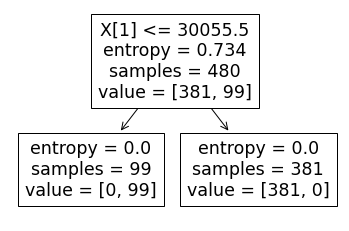

In [23]:
#plot the decision tree
tree.plot_tree(model1)

In [24]:
y_pred_train =model1.predict(x_train)
y_pred_test=model1.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_train, y_pred_train)

1.0

In [27]:
accuracy_score( y_test,y_pred_test)

1.0

# Building decision tree classifier(CART) using 'gini' as a criterion

In [28]:
model2=DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(167.4, 163.07999999999998, 'X[1] <= 30055.5\ngini = 0.327\nsamples = 480\nvalue = [381, 99]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 381\nvalue = [381, 0]')]

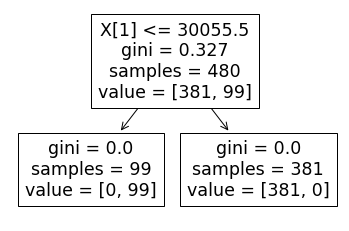

In [29]:
tree.plot_tree(model2)

In [30]:
y_predict_train =model2.predict(x_train)
y_predict_test=model2.predict(x_test)

In [31]:
accuracy_score(y_train, y_pred_train)

1.0

In [32]:
accuracy_score( y_test,y_pred_test)

1.0

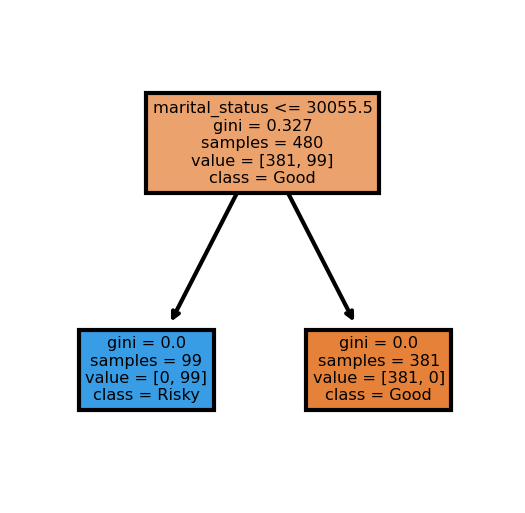

In [33]:
fn=['Undergrad','marital_status','Taxable_income','City_populatoin','Work_experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
#predicting on test dataset and getting the count of each category
preds=model2.predict(x_test)
pd.Series(preds).value_counts()

Good     95
Risky    25
dtype: int64

In [35]:
preds

array(['Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',

In [36]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
Income,,
Good,95,0
Risky,0,25


# Infernce:
There are no misclassification by model, as we have less data

In [37]:
#Accuracy
np.mean(preds==y_test)

1.0

# Inference:
By using both the criterions 'Entropy' and 'gini' we got the same accuracy for training and testing data

# Ensamble Technique:
Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree.

Bagging- is to reduce the variance of a decision tree
Boosting- to make a collection of predictors.

In [38]:
from sklearn.model_selection import KFold , cross_val_score
kfold=KFold(n_splits=10)

In [39]:
from sklearn.ensemble import BaggingClassifier 
cart=DecisionTreeClassifier(criterion='entropy')
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=7)
bag_results= cross_val_score(bagging_model,x,y,cv=kfold)

bag_results_1 = cross_val_score(bagging_model,x_train ,y_train,cv=kfold)

In [40]:
print(bag_results.mean())#full data

0.9983333333333334


In [41]:
print(bag_results_1.mean())#split data

0.9979166666666666


# Observation:
As we can see that the model has learned data in a better way as it has not done any misclassifications, and we got 99% accuracy for both training and testing data,Due to less data provision